In [5]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [11]:
track = pd.read_excel('5G-Dynamic-Coverage-user_trajectory/user_initial.xls')
track.loc[0]
track.head()

,user_id,longitude,latitude,elevation,x_speed,y_speed,z_speed,x_acc,y_acc,z_acc,time
0,1,-122.259610,37.867177,49.921351,-0.169294,0.620452,-0.417935,-0.583387,4.836993,-0.414609,15:34:11.481555
1,2,-122.256701,37.872775,50.108972,4.664167,-2.736662,0.064353,2.712839,-6.744662,-3.124752,15:34:11.481555
2,3,-122.255000,37.871463,54.456963,13.104993,1.977972,2.070656,-1.103840,-1.205421,-0.799713,15:34:11.481555
3,4,-122.258778,37.872179,48.022618,0.601544,2.017948,-3.087260,1.812966,4.352985,0.621629,15:34:11.481555
4,5,-122.256993,37.869988,50.154411,0.239471,1.625845,-0.435006,-0.608901,2.112429,3.401378,15:34:11.481555


In [7]:

duration = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

<IPython.core.display.Javascript object>


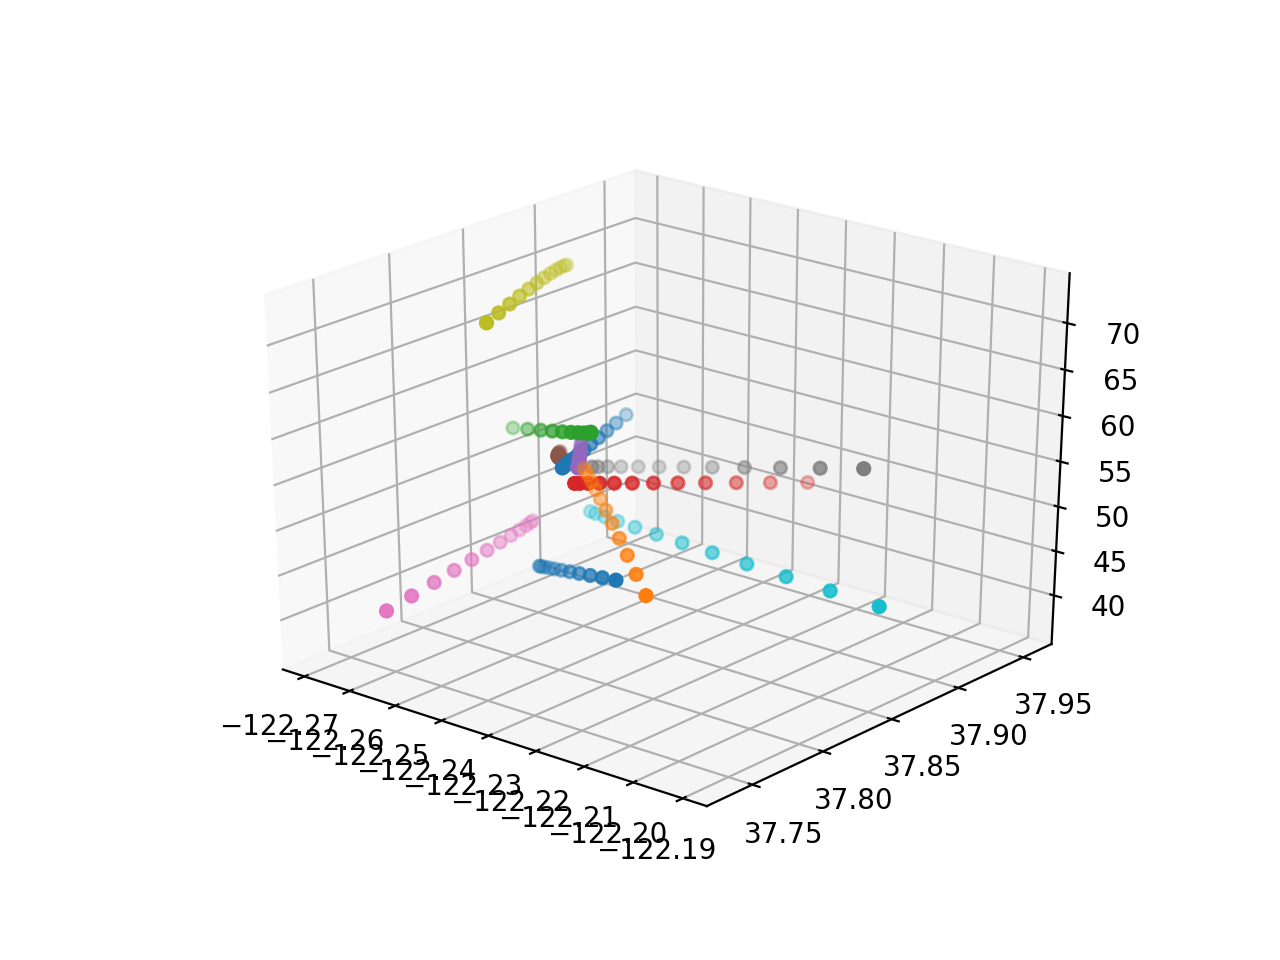

In [10]:
# user id 1-10
fig = plt.figure()
users = [0,1,2,3,4,5,6,7,8,9,10]
ax = plt.axes(projection="3d")
for user in users:
    long, lat, ele = [], [], []
    cur_long = track.loc[user]['longitude']
    cur_lat = track.loc[user]['latitude']
    cur_ele = track.loc[user]['elevation']
    x_speed = track.loc[user]['x_speed']/111111
    y_speed = track.loc[user]['y_speed']/111111
    z_speed = track.loc[user]['z_speed']/111111
    x_acc = track.loc[user]['x_acc']/111111
    y_acc = track.loc[user]['y_acc']/111111
    z_acc = track.loc[user]['z_acc']/111111

    for dur in duration:
        long.append(cur_long + x_speed*dur + 1/2*x_acc*dur**2)
        lat.append(cur_lat + y_speed*dur + 1/2*y_acc*dur**2)
        ele.append(cur_ele + z_speed*dur + 1/2*z_acc*dur**2)

    ax.scatter3D(long, lat, ele, cmap='magma');
    
    
plt.show()

In [5]:
long, lat, ele

([-122.26734163522362,
  -122.26725109400991,
  -122.26691573297288,
  -122.26633555211255,
  -122.26551055142893,
  -122.264440730922,
  -122.26312609059178,
  -122.26156663043822,
  -122.2597623504614,
  -122.25771325066125,
  -122.25541933103781,
  -122.25288059159107],
 [37.87501727682535,
  37.87501928826003,
  37.875172746418336,
  37.87547765130029,
  37.875934002905865,
  37.876541801235085,
  37.87730104628793,
  37.87821173806442,
  37.87927387656455,
  37.880487461788306,
  37.8818524937357,
  37.88336897240673],
 [37.025782087634205,
  37.02667209441361,
  37.028094040526604,
  37.03004792597318,
  37.032533750753345,
  37.035551514867095,
  37.03910121831443,
  37.043182861095346,
  37.04779644320985,
  37.05294196465794,
  37.058619425439616,
  37.06482882555487])

In [6]:
d = {'time':duration, 'longitude':long, 'latitude':lat, 'elevation':ele}
pd.DataFrame(data=d)

,time,longitude,latitude,elevation
0,5,-122.267342,37.875017,37.025782
1,10,-122.267251,37.875019,37.026672
2,15,-122.266916,37.875173,37.028094
3,20,-122.266336,37.875478,37.030048
4,25,-122.265511,37.875934,37.032534
5,30,-122.264441,37.876542,37.035552
6,35,-122.263126,37.877301,37.039101
7,40,-122.261567,37.878212,37.043183
8,45,-122.259762,37.879274,37.047796
9,50,-122.257713,37.880487,37.052942
